In [2]:
import pandas as pd
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [5]:
data_iFood = pd.read_csv('cleaned_data.csv', encoding = 'latin-1')

data_iFood.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,days_until,consolidated_marital_status-Married,consolidated_marital_status-Single,consolidated_marital_status-Together,age,Education2nCycle,EducationBasic,EducationGraduation,EducationMaster,EducationPhD
0,58138.0,0,0,58,635,88,546,172,88,88,...,4054,0,1,0,62,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,3504,0,1,0,65,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,3703,0,0,1,54,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,3530,0,0,1,35,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3552,1,0,0,38,0,0,0,0,1


In [ ]:

# Define the target variable and features
target_variable = 'Response'
X = data_iFood.drop(columns=[target_variable])
y = data_iFood[target_variable]

# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of classification models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(random_state=42)
}



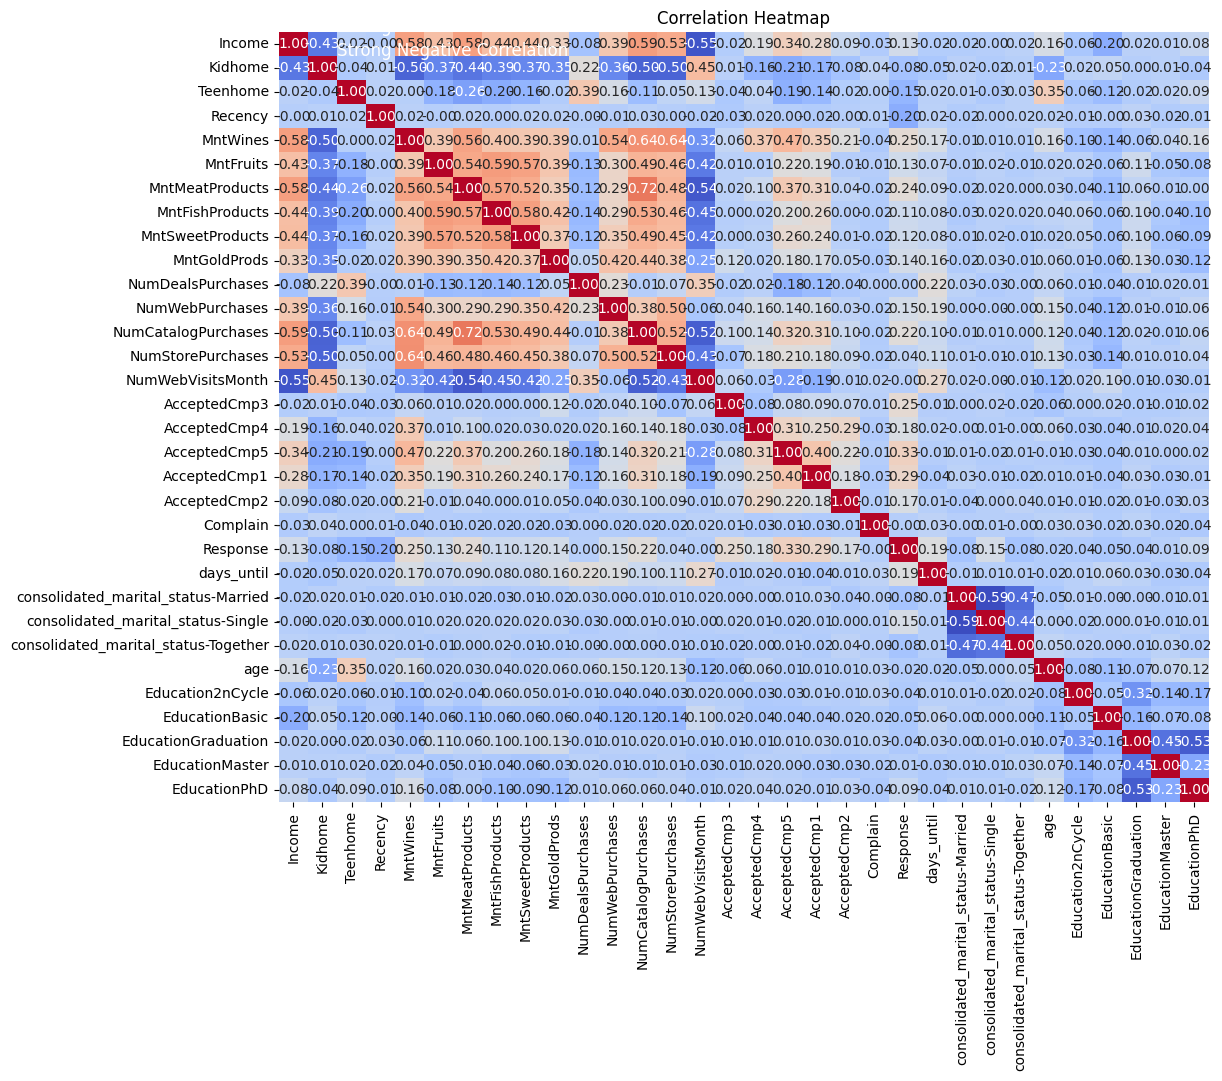

In [ ]:
# corrlation matrix

# Calculate the correlation matrix
correlation_matrix = data_iFood.corr()

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)

# Set the plot title
plt.title("Correlation Heatmap")

plt.annotate("Strong Positive Correlation", xy=(2, 0), fontsize=12, color='white')
plt.annotate("Strong Negative Correlation", xy=(2, 1), fontsize=12, color='white')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets (X_train, X_test, y_train, y_test)
from sklearn.model_selection import train_test_split
X = data_iFood.drop(columns=['Response'])
y = data_iFood['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:



# Scenario 1: Lasso Feature Selection + Random Forest
# Create a Lasso logistic regression model for feature selection
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lasso_model.fit(X_train, y_train)

# Use SelectFromModel to select important features
sfm = SelectFromModel(lasso_model)
sfm.fit(X_train, y_train)
X_train_lasso = sfm.transform(X_train)
X_test_lasso = sfm.transform(X_test)

# Create a Random Forest classifier and train it on Lasso-selected features
model_lasso = RandomForestClassifier()
model_lasso.fit(X_train_lasso, y_train)

# Predict probabilities on the test set
y_pred_proba_lasso = model_lasso.predict_proba(X_test_lasso)[:, 1]

# Calculate AUC for Scenario 1
auc_lasso = roc_auc_score(y_test, y_pred_proba_lasso)
print(f'AUC after Lasso feature selection: {auc_lasso:.2f}')




AUC after Lasso feature selection: 0.86


In [ ]:
# Get the selected features
selected_features = X_train.columns[sfm.get_support()]

# Display the selected features
print("Selected Features from Lasso:")
print(selected_features)

Selected Features from Lasso:
Index(['Income', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'days_until', 'consolidated_marital_status-Married',
       'consolidated_marital_status-Together', 'age', 'Education2nCycle',
       'EducationBasic', 'EducationGraduation', 'EducationPhD'],
      dtype='object')


In [ ]:
# Scenario 2: PCA + Random Forest
# Perform PCA on the original features
pca = PCA(n_components=0.95)  # You can adjust the explained variance ratio
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a Random Forest classifier and train it on PCA-reduced features
model_pca = RandomForestClassifier()
model_pca.fit(X_train_pca, y_train)

# Predict probabilities on the test set
y_pred_proba_pca = model_pca.predict_proba(X_test_pca)[:, 1]

# Calculate AUC for Scenario 2
auc_pca = roc_auc_score(y_test, y_pred_proba_pca)
print(f'AUC after PCA dimension reduction: {auc_pca:.2f}')

AUC after PCA dimension reduction: 0.63


In [ ]:
# Create a Lasso logistic regression model for feature selection
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lasso_model.fit(X_train, y_train)

# Use SelectFromModel to select important features
sfm = SelectFromModel(lasso_model)
sfm.fit(X_train, y_train)
X_train_lasso = sfm.transform(X_train)
X_test_lasso = sfm.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on the Lasso-selected features
pca = PCA(n_components=0.95)  # You can adjust the explained variance ratio
X_train_pca = pca.fit_transform(X_train_lasso)
X_test_pca = pca.transform(X_test_lasso)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Create a classification model (e.g., RandomForest) and train it
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC after feature selection and PCA: {auc:.2f}')


AUC after feature selection and PCA: 0.64


In [5]:
X = data_iFood.drop(columns=['Response'])
y = data_iFood['Response']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
data_iFood_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# You can add the target variable back to the scaled DataFrame if needed
data_iFood_scaled['Response'] = y

# Now 'data_iFood_scaled' contains the scaled data


In [6]:
data_iFood_scaled.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,consolidated_marital_status-Married,consolidated_marital_status-Single,consolidated_marital_status-Together,age,Education2nCycle,EducationBasic,EducationGraduation,EducationMaster,EducationPhD,Response
0,0.235031,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,-0.792406,1.346874,-0.591099,0.985345,-0.315684,-0.157171,0.993769,-0.444816,-0.526385,1
1,-0.234877,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-0.792406,1.346874,-0.591099,1.235733,-0.315684,-0.157171,0.993769,-0.444816,-0.526385,0
2,0.771915,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,-0.792406,-0.742460,1.691765,0.317643,-0.315684,-0.157171,0.993769,-0.444816,-0.526385,0
3,-1.019704,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-0.792406,-0.742460,1.691765,-1.268149,-0.315684,-0.157171,0.993769,-0.444816,-0.526385,0
4,0.241207,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,1.261980,-0.742460,-0.591099,-1.017761,-0.315684,-0.157171,-1.006270,-0.444816,1.899751,0


In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
X = data_iFood_scaled.drop(columns=['Response'])  # Features
y = data_iFood_scaled['Response']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

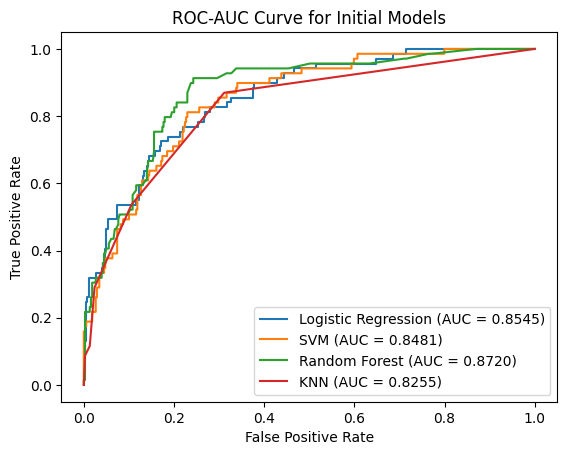

In [9]:

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

auc_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    auc_scores[model_name] = auc_score
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC-AUC Curve for Initial Models")
plt.show()


In [10]:
# Feature selection using Lasso
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

# Select features with nonzero coefficients
sfm = SelectFromModel(lasso_model, prefit=True)
selected_features = X_train.columns[sfm.get_support()]

print("Selected Features post Lasso:")
print(selected_features)



Selected Features post Lasso:
Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'days_until',
       'consolidated_marital_status-Single', 'age', 'Education2nCycle',
       'EducationBasic', 'EducationMaster', 'EducationPhD'],
      dtype='object')


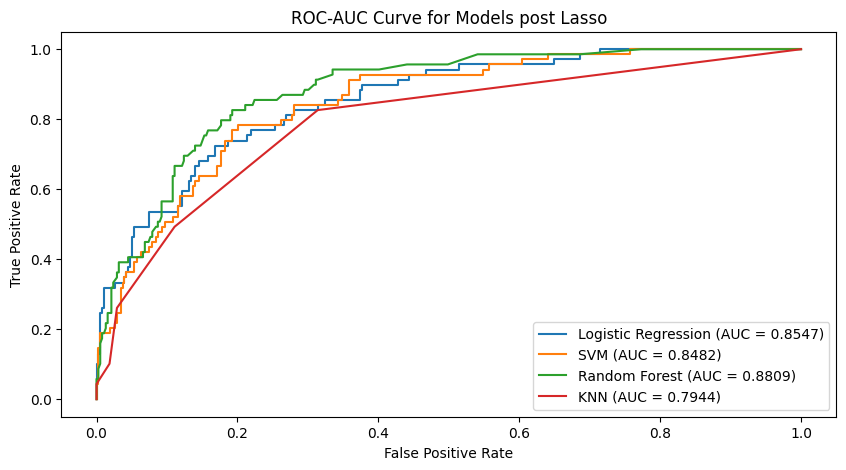

In [13]:
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]
# Run the models again with the selected features
models_post_lasso = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}
plt.figure(figsize=(10, 5))  # Create a new plot
lasso_auc_scores = {}
for model_name, model in models_post_lasso.items():
    model.fit(X_train_lasso, y_train)
    y_prob = model.predict_proba(X_test_lasso)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    lasso_auc_scores[model_name] = auc_score
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC-AUC Curve for Models post Lasso")
plt.show()


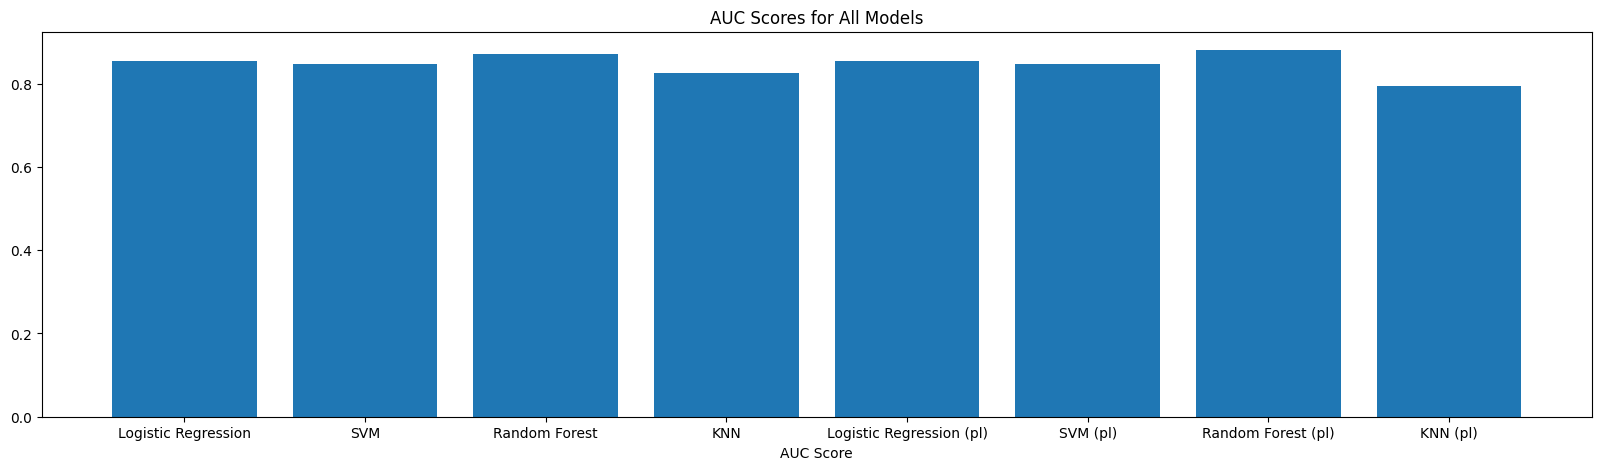

In [14]:
# Combine auc_scores and lasso_auc_scores with unique model names
all_auc_scores = {model_name: auc_scores[model_name] for model_name in auc_scores}
all_auc_scores.update({f"{model_name} (pl)": lasso_auc_scores[model_name] for model_name in lasso_auc_scores})

model_names = list(all_auc_scores.keys())
auc_values = list(all_auc_scores.values())

plt.figure(figsize=(20, 5))
plt.bar(model_names, auc_values)
plt.xlabel("AUC Score")
plt.title("AUC Scores for All Models")
plt.show()


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Create dictionaries to store the evaluation metrics
evaluation_metrics = {}
model_names_with_recall = []  # Store model names with recall scores

# Function to find the optimal threshold and calculate metrics
def find_optimal_threshold_metrics(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    Youden = tpr - fpr
    optimal_idx = np.argmax(Youden)
    optimal_threshold = thresholds[optimal_idx]

    y_pred = (y_prob >= optimal_threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    return {
        "Optimal_Threshold": optimal_threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1_Score": f1,
        "Specificity": specificity,
        "Sensitivity": tpr[optimal_idx]
    }

# Iterate through all 8 models (4 without Lasso and 4 post Lasso)
for model_name, model in models.items():
    evaluation_metrics[model_name] = find_optimal_threshold_metrics(model, X_test, y_test, model_name)
    model_names_with_recall.append(model_name)

for model_name, model in models_post_lasso.items():
    # Add a suffix to the model name for post Lasso models
    model_name_post_lasso = model_name + " (post Lasso)"
    evaluation_metrics[model_name_post_lasso] = find_optimal_threshold_metrics(model, X_test_lasso, y_test, model_name_post_lasso)
    model_names_with_recall.append(model_name_post_lasso)

# Print the evaluation metrics for all 8 models
for model_name, metrics in evaluation_metrics.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.2f}")
    print("\n")




Model: Logistic Regression
Optimal_Threshold: 0.15
Accuracy: 0.81
Precision: 0.43
Recall: 0.72
F1_Score: 0.54
Specificity: 0.83
Sensitivity: 0.72


Model: SVM
Optimal_Threshold: 0.10
Accuracy: 0.78
Precision: 0.39
Recall: 0.81
F1_Score: 0.53
Specificity: 0.77
Sensitivity: 0.81


Model: Random Forest
Optimal_Threshold: 0.14
Accuracy: 0.78
Precision: 0.41
Recall: 0.91
F1_Score: 0.56
Specificity: 0.76
Sensitivity: 0.91


Model: KNN
Optimal_Threshold: 0.20
Accuracy: 0.72
Precision: 0.34
Recall: 0.87
F1_Score: 0.49
Specificity: 0.69
Sensitivity: 0.87


Model: Logistic Regression (post Lasso)
Optimal_Threshold: 0.15
Accuracy: 0.81
Precision: 0.44
Recall: 0.72
F1_Score: 0.55
Specificity: 0.83
Sensitivity: 0.72


Model: SVM (post Lasso)
Optimal_Threshold: 0.12
Accuracy: 0.80
Precision: 0.42
Recall: 0.78
F1_Score: 0.54
Specificity: 0.80
Sensitivity: 0.78


Model: Random Forest (post Lasso)
Optimal_Threshold: 0.18
Accuracy: 0.81
Precision: 0.44
Recall: 0.83
F1_Score: 0.57
Specificity: 0.81
Sensi

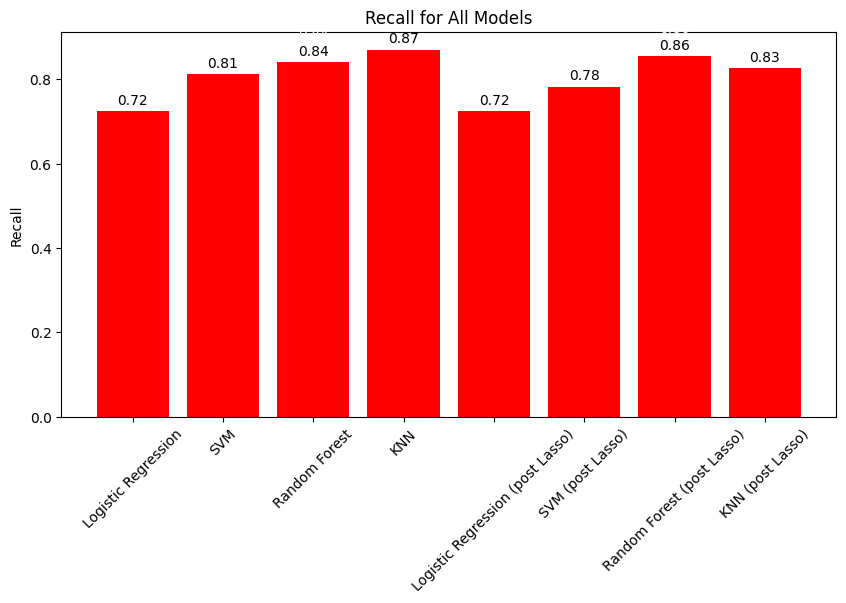

In [43]:

model_names_with_recall = [name.replace('\n', ' ') for name in model_names_with_recall]


recall_values = [evaluation_metrics[model_name]["Recall"] for model_name in model_names_with_recall]

plt.figure(figsize=(10, 5))
bars = plt.bar(model_names_with_recall, recall_values, color='red')  # Set bar color to red

for bar, recall in zip(bars, recall_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{recall:.2f}', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{recall:.2f}', ha='center', va='bottom', color='white')

plt.ylabel("Recall")
plt.title("Recall for All Models")

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


we need to hypertune our parameters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

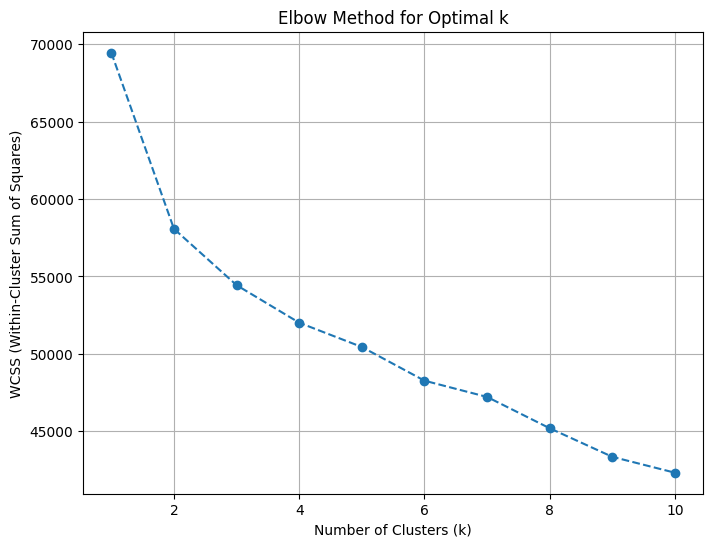

In [17]:
X = data_iFood.drop(columns=['Response'])

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a list to store the WCSS values for different k
wcss = []

# Iterate over a range of k values and calculate WCSS for each
for k in range(1, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values for different k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [25]:

data_iFood['AcceptedCmp'] = data_iFood[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].any(axis=1).astype(int)
data_iFood.head(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,consolidated_marital_status-Single,consolidated_marital_status-Together,age,Education2nCycle,EducationBasic,EducationGraduation,EducationMaster,EducationPhD,Cluster,AcceptedCmp
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,62,0,0,1,0,0,2,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,65,0,0,1,0,0,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


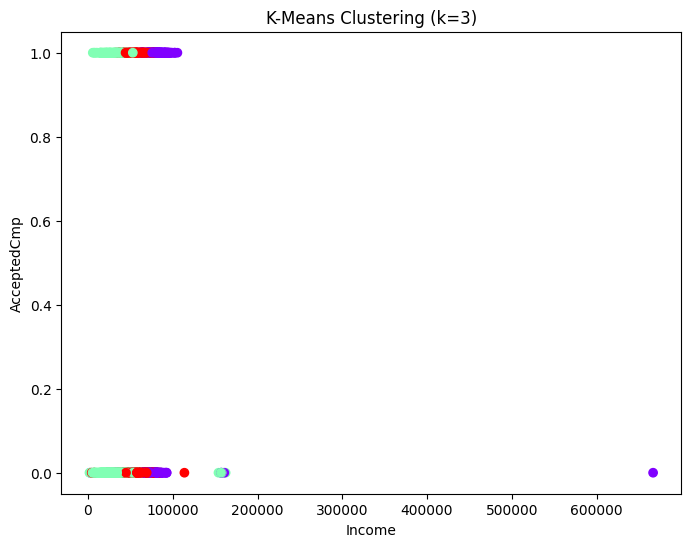

In [27]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set the number of clusters
k = 3

# Fit K-Means clustering with k clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data_iFood['Cluster'] = kmeans.labels_

# Calculate and display the centroids (mean values) of each cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Transform back to the original scale
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)

# Visualize the clusters in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X['Income'], X['AcceptedCmp'], c=data_iFood['Cluster'], cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('AcceptedCmp')
plt.title('K-Means Clustering (k=3)')
plt.show()



In [8]:
data_iFood['TotalGoldRegular'] = data_iFood['MntWines'] + data_iFood['MntFruits'] + data_iFood['MntSweetProducts'] + data_iFood['MntFishProducts']+ data_iFood['MntMeatProducts'] + data_iFood['MntGoldProds']
data_iFood.head(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,consolidated_marital_status-Married,consolidated_marital_status-Single,consolidated_marital_status-Together,age,Education2nCycle,EducationBasic,EducationGraduation,EducationMaster,EducationPhD,TotalGoldRegular
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,62,0,0,1,0,0,1617
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,65,0,0,1,0,0,27


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center: Income = 23410.85, TotalGoldRegular = 76.03
Cluster 2 Center: Income = 63092.70, TotalGoldRegular = 872.47
Cluster 3 Center: Income = 42262.54, TotalGoldRegular = 227.96
Cluster 4 Center: Income = 83274.74, TotalGoldRegular = 1422.04


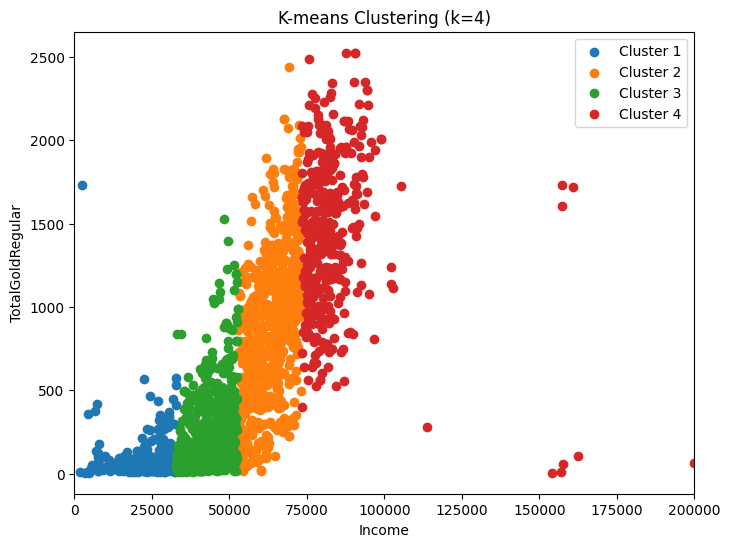

In [42]:
# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Limit the X-axis (Income) to 200,000
data_iFood['Income'] = np.where(data_iFood['Income'] > 200000, 200000, data_iFood['Income'])

# Select the features for clustering
features = data_iFood[['Income', 'TotalGoldRegular']]

# Perform K-means clustering with k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)

# Add the cluster labels to the DataFrame
data_iFood['Cluster'] = kmeans.labels_

# Calculate and display cluster centroids (mean of each cluster)
cluster_centers = kmeans.cluster_centers_
for cluster, center in enumerate(cluster_centers):
    print(f"Cluster {cluster + 1} Center: Income = {center[0]:.2f}, TotalGoldRegular = {center[1]:.2f}")

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
for cluster in range(4):
    plt.scatter(data_iFood[data_iFood['Cluster'] == cluster]['Income'],
                data_iFood[data_iFood['Cluster'] == cluster]['TotalGoldRegular'],
                label=f'Cluster {cluster + 1}')

plt.xlabel('Income')
plt.ylabel('TotalGoldRegular')
plt.title('K-means Clustering (k=4)')
plt.xlim(0, 200000)  # Limit X-axis to 200,000
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


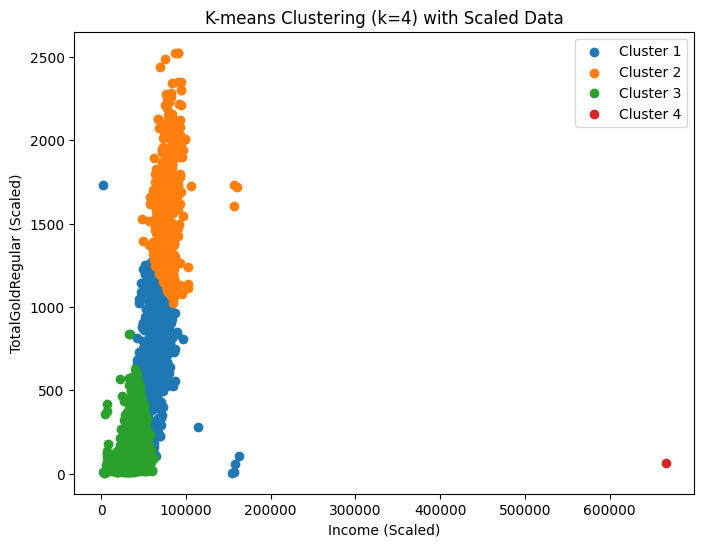

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data_iFood with "Income" and "TotalGoldRegular" columns

# Select the features for clustering
features = data_iFood[['Income', 'TotalGoldRegular']]

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features)

# Add the cluster labels to the DataFrame
data_iFood['Cluster'] = kmeans.labels_

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
for cluster in range(4):
    plt.scatter(data_iFood[data_iFood['Cluster'] == cluster]['Income'],
                data_iFood[data_iFood['Cluster'] == cluster]['TotalGoldRegular'],
                label=f'Cluster {cluster + 1}')

plt.xlabel('Income (Scaled)')
plt.ylabel('TotalGoldRegular (Scaled)')
plt.title('K-means Clustering (k=4) with Scaled Data')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


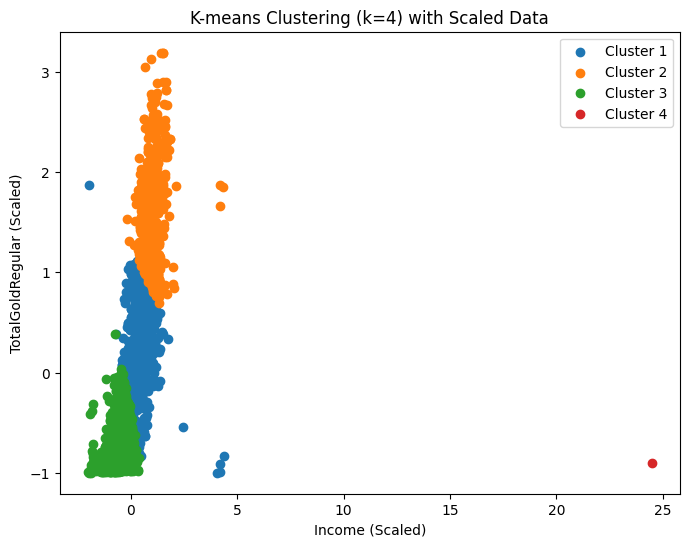

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data_iFood with "Income" and "TotalGoldRegular" columns

# Select the features for clustering
features = data_iFood[['Income', 'TotalGoldRegular']]

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Replace the original columns with scaled values
data_iFood[['Income', 'TotalGoldRegular']] = scaled_features

# Perform K-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features)

# Add the cluster labels to the DataFrame
data_iFood['Cluster'] = kmeans.labels_

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
for cluster in range(4):
    plt.scatter(data_iFood[data_iFood['Cluster'] == cluster]['Income'],
                data_iFood[data_iFood['Cluster'] == cluster]['TotalGoldRegular'],
                label=f'Cluster {cluster + 1}')

plt.xlabel('Income (Scaled)')
plt.ylabel('TotalGoldRegular (Scaled)')
plt.title('K-means Clustering (k=4) with Scaled Data')
plt.legend()
plt.show()
